In [161]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

num=0
def main():
    global num
    img_path1 = '/home/apd/code/CSE_Lab/CSE_4_1_DIP/DIP/Image/image13.jpg' 

    #open cv2 read image in BGR format
    #but malplotlib read image in RGB formate
    img1 = plt.imread(img_path1)

    #image resize
    img1=cv2.resize(img1,(100,100))

    num+=1
    plt.figure(figsize=(10,6))
    plt.subplot(3,2,num)
    plt.title('Original Image')
    plt.imshow(img1)

    count = histo(img1)
    cdf=pdf_cdf(count)
    hist_equalization(img1,cdf)


    plt.tight_layout()
    plt.show()



In [162]:
def histo(img1):
    global num
    count=np.zeros(256)
    for i in range(100):
        for j in range(100):
            count[img1[i][j]]+=1
    
    #for plotting 
    num+=1
    x=np.arange(256) 
    plt.subplot(3,2,num)
    plt.grid(True)
    plt.title("Histogram")
    plt.stem(x,count)

    return count

In [163]:
# PDF(probability distribution function) and CDF (cumulative distribution function)
def pdf_cdf(count):
    global num
    count_cdf=np.zeros(257)
    count_pdf=np.zeros(256)
    for i in range(256):
        val=count[i]
        val/=10000  #total pixel 100*100=10000
        count_pdf[i]=val
        count_cdf[i+1]=count[i]+count_cdf[i];
    
    num+=1
    x=np.arange(256) #for plotting 
    plt.subplot(3,2,num)
    plt.grid(True)
    plt.stem(x,count_pdf)
    plt.title("PDF")

    num+=1    
    x=np.arange(257) #for plotting 
    plt.subplot(3,2,num)
    plt.grid(True)
    plt.plot(x,count_cdf)
    plt.title("CDF")
    return count_cdf;


def hist_equalization(img,cdf):
    # Histogram Equalization as per Gonzalez & Woods  Book(no CDFmin adjustment)
    #cdf[cdf > 0] selects only the non-zero values from cdf.
    cdf_min = np.min(cdf[cdf > 0])
    # gray levels
    L = 256  
    #Book's formula
    s = np.round((256 - 1) * cdf).astype(np.uint8)

    #Apply mapping building function
    equalized_img = s[img]
    show(equalized_img,'Equalized Image (Book Method)')

    # This formula adjusts for the minimum non-zero value in the CDF (cdf_min).
    s = np.round(((cdf - cdf_min) / (100 * 100 - cdf_min)) * (L - 1))
    s = np.clip(s, 0, 255).astype(np.uint8)

    #User defined mapping function
    for i in range(100):
        for j in range(100):
            val=img[i,j]
            img[i,j]=s[val];
    
    # Or building mapping function
    # equalized_img1 = s[img]
    show(img,'Equalized Image with cdf_min adjustment')


In [164]:
def show(img,title):
    global num
    num+=1
    plt.subplot(3,2,num)
    plt.title(title)
    plt.imshow(img)

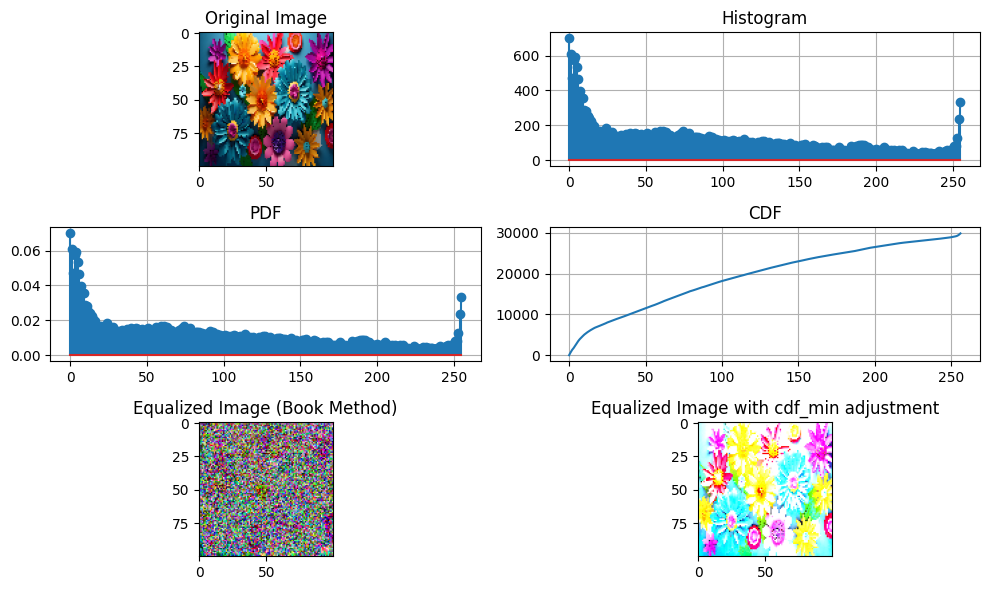

In [165]:
if __name__=='__main__':
    main()